In [1]:
import pandas as pd
import numpy as np
from panel.interact import interact
import json
from pprint import pprint
#import hvplot.pandas

import plotly.express as px




%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/stickybeak/anaconda3/envs/pyv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Data collection
****
## Read CSV's into dataframes


## Unique holders of Axies

In [2]:
#Create dataframes from all csv files
axie_holders_df = pd.read_csv("../Resources/Axie_csv/holders.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True)
axie_holders_df = axie_holders_df.drop(["Date Raw"], axis = 1)

## $AXS token daily close since launch in 2020 (remove all columns except date and price)

In [3]:
#daily AXS token price since token launch

AXS_price_df = pd.read_csv("../Resources/axs-usd-max.csv", parse_dates=True)
#convert datetime (snapped_at) to date
AXS_price_df['Date'] = pd.to_datetime(AXS_price_df['snapped_at']).dt.date
AXS_price_df = (
    AXS_price_df.drop(["snapped_at", "market_cap", "total_volume"], 
    axis = 1)).set_index(["Date"]
    ).rename(columns={"price":"$AXS (USD)"})
#AXS_price_df = AXS_price_df.set_index(["Date"])

## Total transaction volume accross the site

In [4]:
#total transaction volume inc land and slp etc
total_volume_df = pd.read_csv("../Resources/Axie_csv/totalVolume.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True).round(1)
total_volume_df = total_volume_df.drop(["Date Raw"], axis = 1)

## Average price for one Axie

In [5]:
#Average price for one Axie
axieAverage_df = pd.read_csv(
    "../Resources/Axie_csv/axieAverage.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True
    ).round(1)

axieAverage_df = axieAverage_df.drop(
    ["Meo", "Meo USD", "Meo2", "Meo2 USD", "Date Raw", "Mystic4", "Mystic4 USD"], axis = 1
    )


## Sales Volume (Axie only)

In [6]:
#Axie only sales volume
axie_volume_df = pd.read_csv(
    "../Resources/Axie_csv/axieVolume.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True
    ).round(1)
axie_volume_df = axie_volume_df.drop(["Date Raw"], axis = 1)

## Revenue collected by the platform

In [7]:
#Revenue to founders/ dev team
revenue_df = pd.read_csv(
    "../Resources/Axie_csv/revenue.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True
    ).round(1)
revenue_df = revenue_df.drop(
    ["Date Raw", "Axie Presale ETH", "Land Presale ETH", "Marketplace Fee ETH", "Breeding Fee ETH"], axis = 1
    )

## Joining Dataframes

In [8]:
#Join Axie holders table with sales volume and drop nulls

df_holders_and_vol = axie_holders_df.join(total_volume_df, how='left').dropna()

# Visualisations
****
### $AXS Price

In [9]:
#Visualize AXS price
fig_AXS = px.line(AXS_price_df, labels={"value":"$AXS (USD)"})
fig_AXS.show()

## Revenue Streams
****
### Land, Axies, Breeding Fees, Marketplace resale

In [10]:
#Visualise revenue streams
rev_fig = px.line(
    revenue_df,
    labels={"Date Parsed": "Date", "value": "USD"},
    title= "Revenue vs Time",
    )
rev_fig

### Revenue composition

In [11]:
#Take final row of revenue df and produce pie chart showing composition of total revenue to founders
#Shows that Marketplace fees (percentage of resale of in game pets/items/land) have now surpassed all other streams

revenue_pie_data = pd.DataFrame(revenue_df.iloc[-1])

fig_pie = px.pie(revenue_pie_data, values="2021-04-06", names=revenue_pie_data.index, title='Revenue Composition (to date)')
fig_pie.show()


### Unique Players/Owners

In [12]:
#axie holders are increasing exponentially

fig_holders = px.line(axie_holders_df,
    labels={"Date Parsed": "Date", "value": "Holders"},
    title= "Unique Axie holders",
    )
fig_holders.show()

### Axie price average (Eth or USD?)

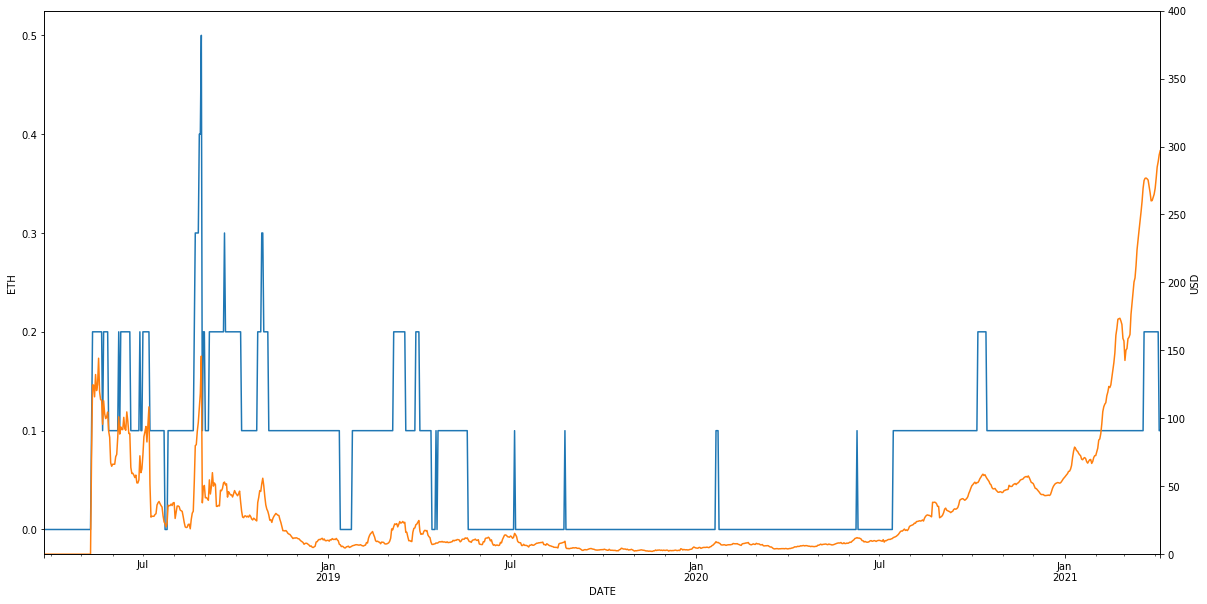

In [13]:
#Visualize Average axie price in ETH and USD - shows that the price is consistant in ETH but tends to ignore the USD value


ax = axieAverage_df['Normal'].plot(figsize=[20,10])
ax2 = axieAverage_df['Normal USD'].plot(secondary_y=True, figsize=[20,10])
ax2.set_ylim(0, 400)
ax2.set_ylabel("USD")
ax.set_ylabel("ETH")
ax.set_xlabel("DATE")

ax_av_fig = ax.get_figure()
ax_av_fig.savefig('AxieAverage price.png')

## Cumulative Sales volume (including secondary marketplace)

In [14]:
# Visualize how Cumulative Sales Volume is also growing exponentially (Only a small portion of these sales generate revenue through a marketplace fee)
# Most of this volume is P2P exchange
cum_sales_fig = px.line(df_holders_and_vol, y="Cummulative Volume USD",
    labels={"Date Parsed": "Date"},
    title= "Cumulative Sales Volume (Axies)"
    )
cum_sales_fig.show()

## Sales Vol vs Holders

In [15]:
#Holders with cum_vol
cum_sales_fig = px.line(df_holders_and_vol, y=["Cummulative Volume USD", "Holders Count"],
    labels={"Date Parsed": "Date"},
    title= "Cumulative Tx Volume/Holders"
    )
cum_sales_fig.show()

## Scaled to show trend
### Using Sci-kit Learn - a machine learning library for Python 

In [16]:
#Scale data using preprocessing to see trends concurrenlty

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(df_holders_and_vol)

scaled

#Returns numpy array

array([[2.30526882e-02, 5.35618640e-01, 4.17307270e-01, 1.23759042e-01,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.42742367e-01, 7.46760378e-01, 2.22012797e-01,
        1.91749147e-02, 1.35810987e-02],
       [7.68422940e-03, 6.96304231e-01, 4.17307270e-01, 1.16864703e-01,
        2.98903082e-02, 2.07300157e-02],
       ...,
       [9.89984888e+01, 3.17086235e+01, 1.31341972e+01, 1.52502661e+01,
        9.95378282e+01, 9.86856486e+01],
       [9.94364898e+01, 2.54954472e+01, 9.72984845e+00, 1.15671819e+01,
        9.97876660e+01, 9.93932432e+01],
       [1.00000000e+02, 2.65131227e+01, 8.26927301e+00, 9.91876924e+00,
        1.00000000e+02, 1.00000000e+02]])

In [17]:
#convert array into df with columns set to solumns in original df

df_scaled = pd.DataFrame(scaled, columns=df_holders_and_vol.columns)

In [18]:
#visualize the scaled data

fig_scale = px.line(df_scaled, y=["Cummulative Volume USD", "Holders Count"],
    labels= {"value":"Scaled Value", "index":"Days Since Launch"},
    title= "Scaled Volume/Holder numbers"
    )
fig_scale.show()
# This shows exponential growth in number of holders is aligned with the exponential increase in  the cumulative volume of revenue.

### Add in $AXS chart

In [19]:
#Join AXS price to scaled data (first join dataframes)
df_holders_and_vol_AXS = df_holders_and_vol.join(AXS_price_df, how='left').dropna()

In [20]:
#scaled data with axs price
scaledAXS = min_max_scaler.fit_transform(df_holders_and_vol_AXS)
df_scaledAXS = pd.DataFrame(scaledAXS, columns=df_holders_and_vol_AXS.columns)

In [21]:
#Visualize all
fig_scaleAXS = px.line(df_scaledAXS, y=["Cummulative Volume USD", "Holders Count","$AXS (USD)"],
    labels= {"value":"Scaled Value", "index":"Days Since AXS Launch"},
    title= "Scaled Volume/Holder numbers/AXS price"
    )
fig_scaleAXS.show()

In [23]:
import panel as pn
pn.extension("plotly")
#PANEL TIME
#Figs:
#fig_scaleAXS, fig_scale, fig_holders, cum_sales_fig, fig_AXS, fig_pie
panelrow = pn.Row(fig_holders, fig_scaleAXS)

panelrow2 = pn.Row(rev_fig, fig_pie)

column = pn.Column(panelrow, panelrow2)

column

Column
    [0] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [1] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)

Tabs
    [0] Column
        [0] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [1] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
    [1] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [2] Plotly(Figure, name='Axie Holders')
    [3] Matplotlib(Figure, name='Average Axie Price')
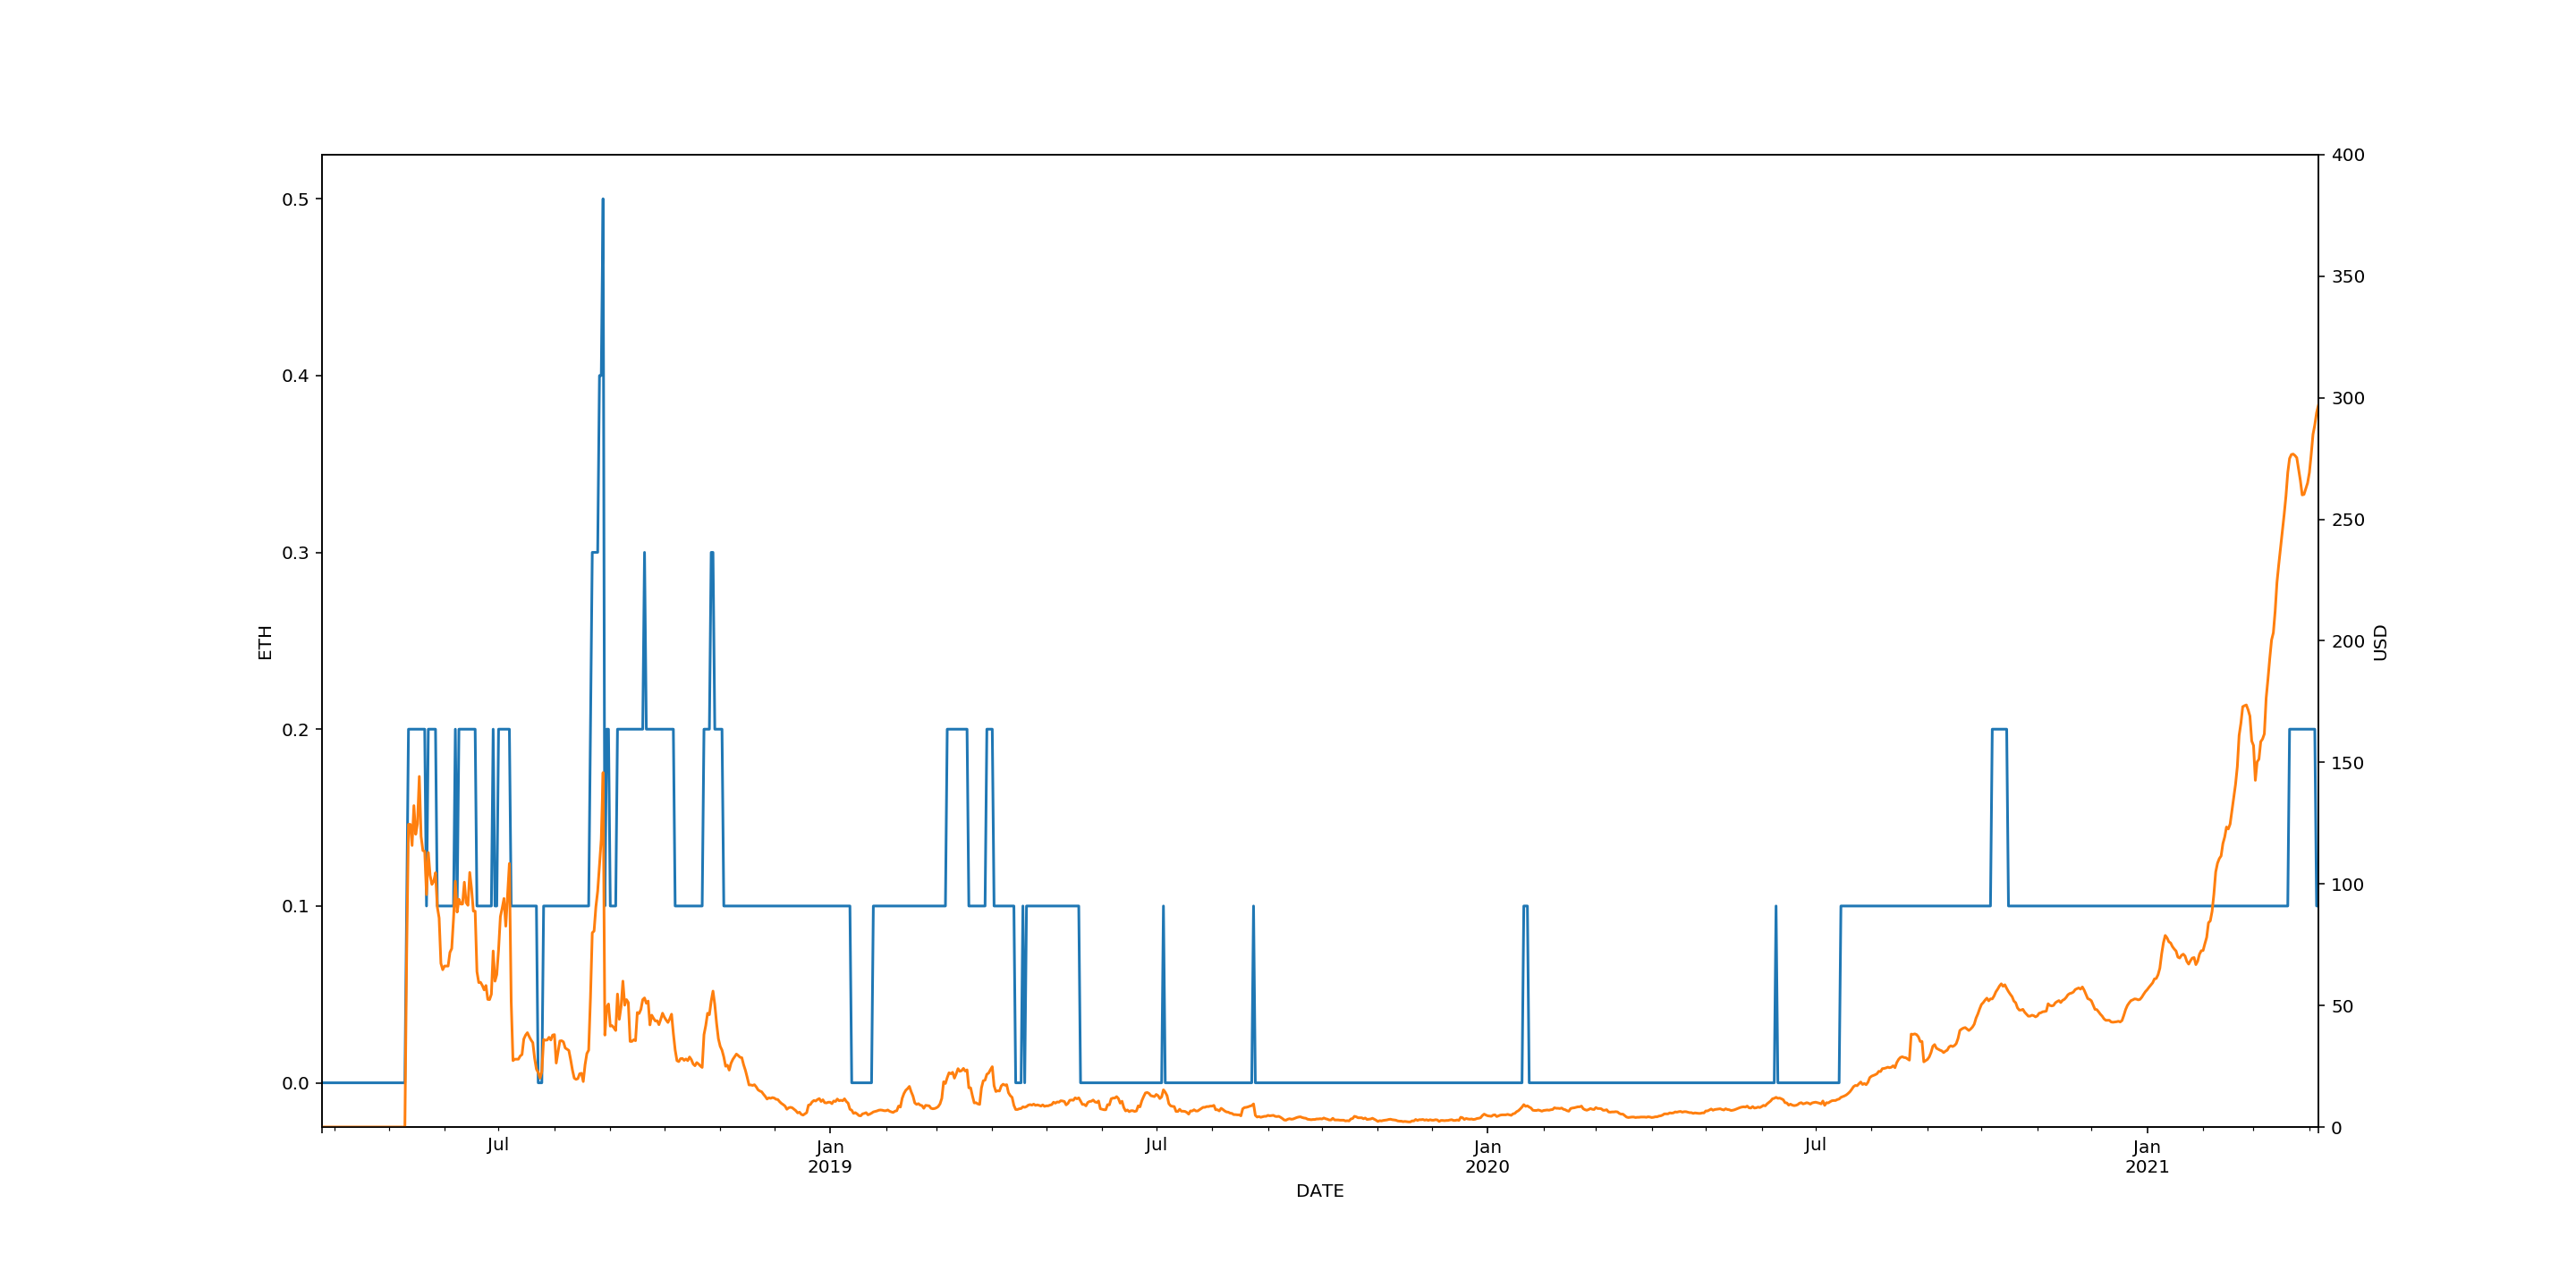

In [50]:
tabrow = pn.Row(rev_fig, fig_pie)
Axietabs = pn.Tabs(
    ("Axie Infinity", column),
    ("Revenue vs Time", tabrow), 
    ("Axie Holders", fig_holders),
    ("Average Axie Price", ax_av_fig)
    )
Axietabs